In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


# Reading and analyzing the dataset
The first step while tackling the problem is to understand the dataset. For this purpose i coslted the datacard from kaggle. This helped me finalize the required features for my model

In [2]:
dataframe = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Dealing with NaN values
A simple look at the information given in the above dataset is enough to tell that there are some missing values in the age column. Since this column will be used as a parameter to our model, we need to fill up the empty values. In this case, I fill up all the empty va 

In [3]:
age_mean = dataframe['Age'].mean()
dataframe['Age'].fillna(age_mean,inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Changing sex to categorical values
It will be much easier for our model if we classified the gender into two categories. 0 indicates a male and 1 indicates a female

In [4]:
dataframe["Sex"] = dataframe['Sex'].apply(lambda x: 0 if x == 'male' else (1 if x == 'female' else -1))
dataframe.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,C


# Extracting the features required
We truncate the dataset to extract only those features which we decided would be a part of our model

In [5]:
dataframe = dataframe.sample(frac=1)
trunc_data = dataframe[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Survived"]]
trunc_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
724,1,0,27.000000,1,0,53.1000,1
87,3,0,29.699118,0,0,8.0500,0
10,3,1,4.000000,1,1,16.7000,1
695,2,0,52.000000,0,0,13.5000,0
33,2,0,66.000000,0,0,10.5000,0
...,...,...,...,...,...,...,...
777,3,1,5.000000,0,0,12.4750,1
839,1,0,29.699118,0,0,29.7000,1
532,3,0,17.000000,1,1,7.2292,0
42,3,0,29.699118,0,0,7.8958,0


# Splitting the data
This part splits the data into training and testing sets

In [6]:
train_x = trunc_data.iloc[:400, 0:6]
train_y = trunc_data.iloc[:400, 6:]
test_x = trunc_data.iloc[400:, 0:6]
test_y = trunc_data.iloc[400:, 6:]

# Normalizing Data

In [7]:
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
train_y = np.ravel(train_y)

# K neighbors Classifier algorithm
First we will use the k neighbors classifier algorithm and see it's accuracy

In [8]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [9]:
model.fit(train_x, train_y)

KNeighborsClassifier()

In [10]:
pred = model.predict(test_x.to_numpy())

In [14]:
right, wrong, total = 0, 0, 0
for actual, predicted in zip(np.ravel(test_y), pred):
    if actual == predicted:
        right += 1
        total += 1
    else:
        wrong += 1
        total += 1
print(f"out of {total} entries {right} were predicted right and {wrong} were predicted wrong and the accuracy was {(right/total)*100}%")
summary = {"Correct" : right, "Wrong" : wrong}

out of 491 entries 337 were predicted right and 154 were predicted wrong and the accuracy was 68.63543788187373%


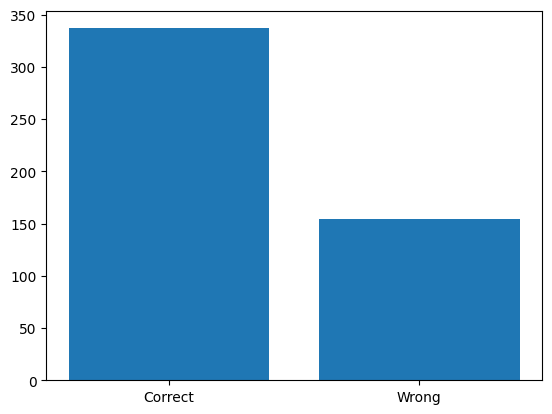

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.bar(summary.keys(), summary.values())
plt.show()

# Support Vector Machine
Next up, we will try support vector machines

In [16]:
from sklearn.svm import SVC
svm_model = SVC(C=3.0)
svm_model.fit(train_x, train_y)
svm_pred = svm_model.predict(test_x.to_numpy())
right, wrong, total = 0, 0, 0
for actual, svm_predicted in zip(np.ravel(test_y), svm_pred):
    if actual == svm_predicted:
        right += 1
        total += 1
    else:
        wrong += 1
        total += 1
print(f"out of {total} entries {right} were predicted right and {wrong} were predicted wrong and the accuracy was {(right/total)*100}%")
summary = {"Correct" : right, "Wrong" : wrong}

out of 491 entries 341 were predicted right and 150 were predicted wrong and the accuracy was 69.4501018329939%


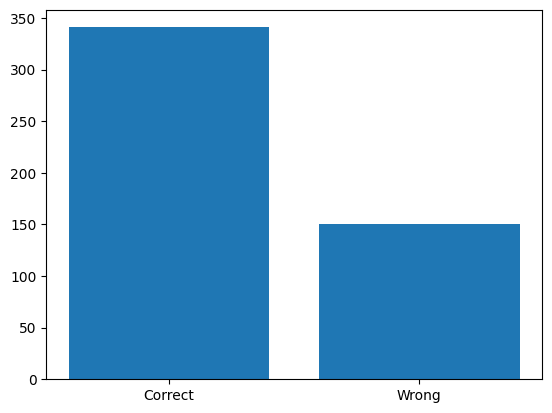

In [17]:
fig = plt.figure()
plt.bar(summary.keys(), summary.values())
plt.show()

# Random Forest Classifier
Now we will see the performance of the random forest classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=400)
rfc_model.fit(train_x, train_y)
rfc_pred = rfc_model.predict(test_x.to_numpy())
right, wrong, total = 0, 0, 0
for actual, rfc_predicted in zip(np.ravel(test_y), rfc_pred):
    if actual == rfc_predicted:
        right += 1
        total += 1
    else:
        wrong += 1
        total += 1
print(f"out of {total} entries {right} were predicted right and {wrong} were predicted wrong and the accuracy was {(right/total)*100}%")
summary = {"Correct" : right, "Wrong" : wrong}

out of 491 entries 394 were predicted right and 97 were predicted wrong and the accuracy was 80.24439918533605%


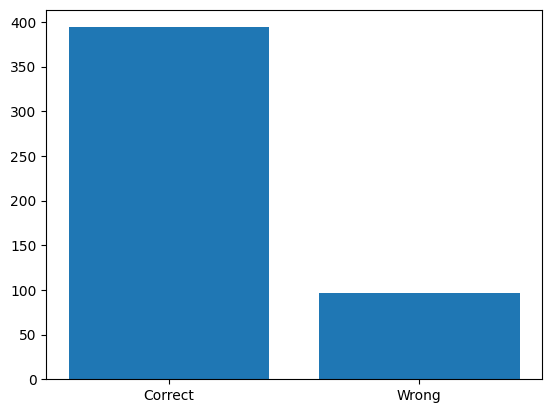

In [19]:
fig = plt.figure()
plt.bar(summary.keys(), summary.values())
plt.show()

# Logistic Regression
Finally we will see how logistic regression performs

In [20]:
from sklearn.linear_model import LogisticRegression
r_model = LogisticRegression()
r_model.fit(train_x, train_y)
r_pred = r_model.predict(test_x.to_numpy())
right, wrong, total = 0, 0, 0
for actual, r_predicted in zip(np.ravel(test_y), r_pred):
    if actual == r_predicted:
        right += 1
        total += 1
    else:
        wrong += 1
        total += 1
print(f"out of {total} entries {right} were predicted right and {wrong} were predicted wrong and the accuracy was {(right/total)*100}%")
summary = {"Correct" : right, "Wrong" : wrong}

out of 491 entries 394 were predicted right and 97 were predicted wrong and the accuracy was 80.24439918533605%


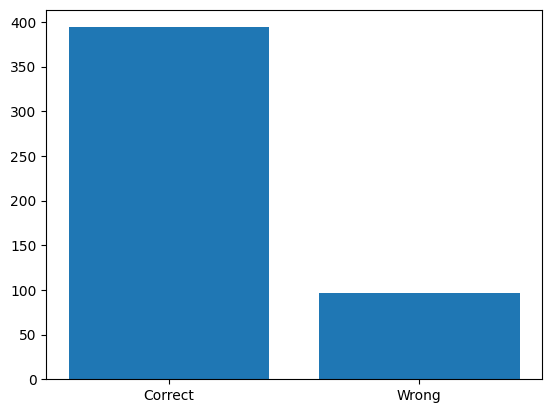

In [21]:
fig = plt.figure()
plt.bar(summary.keys(), summary.values())
plt.show()